MINI-PROJET : UN EXEMPLE DE SYSTEME CHAOTIQUE

In [6]:
import matplotlib.pyplot as plt #importe la bibliothèque matplotlib.pyplot
import numpy as np
import pandas as pd

Un système chaotique se caractérise par une extrême sensibilité à ses conditions initiales, ce qui signifie qu'une perturbation minime de la condition initiale d'un système dynamique entraînera des conséquences significatives sur son évolution au fil du temps. En particulier, nous examinons le concept de chaos déterministe, où le comportement chaotique résulte de la sensibilité aux conditions initiales plutôt que de la complexité des équations ou de l'introduction de paramètres aléatoires.

Ici, on étudiera ce problème au travers de l'évolution d'une population de lapins. 

On notera $n_i$ la population de lapins l'année $i$, et $a$ le nombre de petits par portée (une par an).
On a $n_i+1$=$a$*$n_i$

Pour représenter $a$ le nombre de petits par portée dans la réalité, on notera $r$ le taux de croissance maximal et $n_max$ le nombre maximal de lapins qu'il peut exister.

On obtient donc : $a$ = $r$*(1-($n_i$/$n_max$))

L’équation d’évolution de la population devient alors $n_i+1$ = $r$*(1-($n_i$/$n_max$))*$n_i$ et peut se réécrire avec la nouvelle variable $x_i$=$n_i$/$n_max$ que l’on appelle « l’équation logistique ». Pour l’étude de cette équation, on introduit la fonction f(x)=$r$*(1-$x_i$)*$x_i$
dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite $x_i+1$=f($x_i$)
présente un comportement chaotique. 


On veut représenter de façon graphique le comportement de la suite pour $r$ = 2.5 et $a$ = 0.1

La fonction f créée ci-dessous prend en compte 3 paramètres : r le paramètre de croissance, $x_0$ la condition initiale et t le nombre d'années écoulées, c'est-à-dire ici le nombre d'itérations à effectuer.

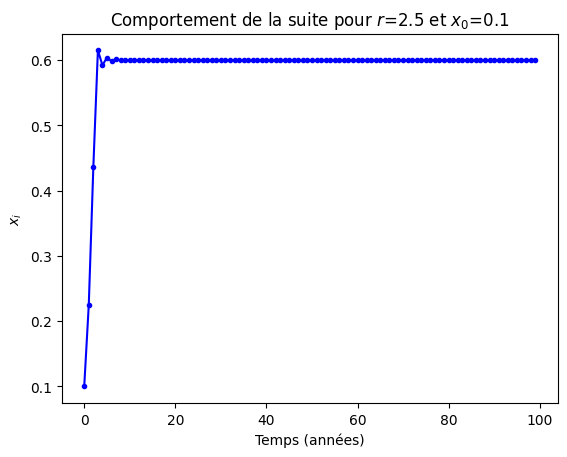

In [7]:
def f(r, x0, t):
    result = [] # liste vide pour stocker les valeurs de la fonction 
    x = x0
    for i in range(t):
        result.append(x)
        x = r * (1 - x) * x
    return result

# Paramètres
r = 2.5
x0 = 0.1
t = 100

# Générer la suite
val = f(r, x0, t) # stocke la suite générée dans la liste 'val'

# Représentation graphique
plt.plot(val, 'bo-', markersize=3) # création du graphe
plt.xlabel('Temps (années)') # titre de l'axe des abscisses
plt.ylabel('$x_i$') #titre de l'axe des ordonnées
plt.title('Comportement de la suite pour $r$=2.5 et $x_{0}$=0.1') # titre du graphique
plt.show()


On veut désormais créer le diagramme de bifurcation, qui va nous aider à étudier la limite (lorsqu’elle existe) de la suite des $x_i$ définie par l’équation logistique, de façon systématique. Plus précisément, on souhaite étudier la manière dont cette limite dépend de la valeur de $r$. 

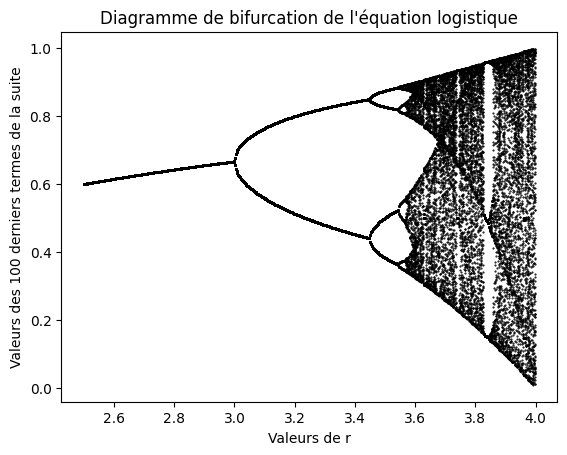

In [5]:
def limite(r, x0, t):
    result = [] # Crée une liste vide pour stocker les valeurs de la fonction
    x = x0
    for i in range(t):
        x = r * (1 - x) * x
        if i >= (t - 100):  # Garde uniquement les 100 derniers termes
            result.append(x)
    return result

# Paramètres
num_points = 500  # Nombre de valeurs de r dans l'intervalle
r_values = [2.5 + i * (1.5 / num_points) for i in range(num_points)]  # Génére des valeurs de r de manière uniforme

# Génére le diagramme de bifurcation
bifurcation_diagram = []

for r in r_values:
    x0 = 0.00001
    values = limite(r, x0, 1000)
    bifurcation_diagram.extend([(r, val) for val in values])

# Représentation graphique
plt.scatter(*zip(*bifurcation_diagram), s=1, marker='.', color='black')
plt.xlabel('Valeurs de r')
plt.ylabel('Valeurs des 100 derniers termes de la suite')
plt.title('Diagramme de bifurcation de l\'équation logistique')
plt.show()


$Remarque$ : On a utilisé plt.scatter plutôt que plt.plot pour créer un nuage de points dans le diagramme de bifurcation

On peut observer que certaines valeurs de r peuvent conduire à une convergence vers une valeur limite (stabilité), tandis que d'autres peuvent donner lieu à un comportement chaotique où la suite ne converge pas vers une valeur fixe. Ces régions alternent sur le diagramme de bifurcation.

Quant à la dépendance de la valeur initiale $x_0$ (condition initiale), le diagramme de bifurcation en général ne dépend pas spécifiquement de cette valeur. Cependant, le comportement de la suite peut être très sensible aux conditions initiales, comme le suggère la nature chaotique du système logistique. De petites variations dans $x_0$ peuvent conduire à des trajectoires très différentes au fil du temps.

$Remarque$ : je n'ai pas encore réussi la partie avec l'exposant de Lyapunov